# Analiza objaśniająca
### Autor: Bartosz Mścichecki

Zbiorem danych, który został wykorzystany przy wizualizacji jest zbiór zawierający informacje o katastrofie Titanica

Titanic był brytyjskim transatlantykiem. Jego budowa została rozpoczęta w 1909 roku, a oddany do eksploatacji w roku 1912. W nocy z dnia 14 na 15 kwietnia 1912 roku, podczas dziewiczego rejsu, doszło do zderzenia z górą lodową i zatopienia statku.

Interesującym aspektem, z punktu widzenia analizy danych, jest informacja na temat przeżycia pasażerów katastrofy. 

Pierwszym krokiem, przed rozpoczęciem analizy zbioru, jest wczytanie odpowiednich bibliotek

In [1]:
import numpy as np
import pandas as pd
import math
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Zapoznanie się ze zbiorem 

W pierwszym kroku należy wczytać zbiór danych

In [2]:
dataset = pd.read_csv('Titanic.csv', sep=',')

W celu zapoznania się ze zbiorem danych, poniżej zostały przedstawione podstawowe informacje na temat zbioru oraz tabela, która pozwala sprawdzić dane znajdujące się w zbiorze.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [6]:
dropdown_survived = widgets.Dropdown(options = unique_sorted_values_plus_ALL(dataset.Survived))

output_survived = widgets.Output()

def dropdown_survived_eventhandler(change):
    output_survived.clear_output()
    with output_survived:
        if(change.new == ALL):
            display(dataset)
        else:
            display(dataset[dataset.Survived == change.new])

dropdown_survived.observe(dropdown_survived_eventhandler, names='value')

display(dropdown_survived)
display(output_survived)

Dropdown(options=('ALL', 0, 1), value='ALL')

Output()

Można zauważyć, że zbiór składa się z 891 instacji oraz 12 zmiennych. Zmienne przedstawiają się następująco:
* **PassengerId** - identyfikator pasażera,
* **Survived** - czy pasażer przeżył: 1 - przeżył, 0 - nie przeżył,
* **Pclass** - klasa, którą podróżował pasażer: 1, 2 lub 3,
* **Name** - imię i nazwisko pasażera,
* **Sex** - płeć pasażera,
* **Age** - wiek w latach,
* **SibSp** - liczba pasażerów w postaci rodzeństwa lub męża/żony, z którymi pasażer podróżował,
* **Parch** - ilość dzieci lub rodziców,
* **Ticket** - numer biletu,
* **Fare** - cena biletu,
* **Cabin** - numer kabiny,
* **Embarked** - port w którym wysiadał: C - Cherboug, Q - Queenstown, S - Southampton.

## Przygotowanie danych do analizy

Po zapoznaniu się ze zbiorem rozpocząłem proces przygotowania zbioru do analizy. Proces ten został podzielony na następujące kroki:
* Usunięcie kolumn, które są zbędne z punktu widzenia analizy,
* Uzupełnienie brakujących danych,
* Sprowadzenie danych w zbiorze do odpowiednich typów.

### Usunięcie kolumn zbędnych dla analizy danych

Ze zbioru zostały usunięte kolumny **Ticket**, **Cabin**, oraz **Name**. Po zapoznaniu się ze zbiorem i dokładnej analizie doszedłem do wniosku, że dane, które są w nich zawarte, nie wniosą żadnych potrzebnych informacji. Usunięcie wykonałem za pomocą poniższych operacji

In [7]:
dataset = dataset.drop(['Ticket', 'Cabin', 'Name'], axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


### Uzupełnienie brakujących danych

Znając informacje na temat zbioru zauważyłem, że występują braki danych w kolumnach **Age** oraz **Embarked**. Aby pozbyć się brakujących danych możemy zastosować dwie drogi:
* usunięcie wierszy z brakującymi wartościami,
* zastąpienie brakujących danych wartością maksymaną, minimalną lub średnią z danych występujących w kolumnie.

Biorąc pod uwagę, że w zmiennej **Age** występuje wiele brakujących wartości usunięcie ich może spowodować utrudnienie w anlizie danych. W związku z tym zostały one zastąpione wartością średnią ze wszystkich wystąpień. Brakujące wartości w zmiennej **Embarked** są jedynie w dwóch wystąpieniach, więc zostaną one usunięte ze zbioru.

In [8]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset = dataset[dataset['Embarked'].notna()]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


### Ustandaryzowanie typów danych

W celu ułatwienia analizy dane, które znajdują się w zbiorze powinny mieć odpowiedni typ. Taki, który faktycznie odzwierciedla ich faktyczny stan. W pierwszym kroku zdecydowałem aby kolumna **Embarked** była zdefiniowana przez typ ,,category'', który określa kolumny zawierające skończoną listę wartości tekstowych (typ ,,object'' definiuje kolumny zawierające tekst). Wykorzystałem do tego następujące operacje

In [9]:
dataset["Embarked"] = dataset["Embarked"].astype("category")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Sex          889 non-null    object  
 4   Age          889 non-null    float64 
 5   SibSp        889 non-null    int64   
 6   Parch        889 non-null    int64   
 7   Fare         889 non-null    float64 
 8   Embarked     889 non-null    category
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 63.5+ KB


Kolejną rzeczą jest fakt, że zmienna **Age** reprezentowana jest przez typ ,,float64''. Oznacza to, że występują w niej liczby zmiennoprzecinkowe. Znając definicję zmiennej (zawiera ona dane reprezenujące wiek) możemy zmienić rozwiązanie prezentacji danych na liczby całkowite. Podobne rozwiązanie możemy zastosować w zmiennej **Fare**.

In [10]:
dataset['Age'] = dataset['Age'].apply(math.ceil)
dataset['Fare'] = dataset['Fare'].apply(math.ceil)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Sex          889 non-null    object  
 4   Age          889 non-null    int64   
 5   SibSp        889 non-null    int64   
 6   Parch        889 non-null    int64   
 7   Fare         889 non-null    int64   
 8   Embarked     889 non-null    category
dtypes: category(1), int64(7), object(1)
memory usage: 63.5+ KB


Na tym etapie przygotowanie danych zostało zakończone. Poniżej zamieszczona została tabela, która pozwala sprawdzić wartości, które występują w zbiorze danych.

## Analiza 

Na początku należy określić, które dane będą przydatne podczas określania czynników przeżycia. Będą to: **wiek**, **klasa**, , którą podróżował pasażer oraz **płeć**. Pozostałe dane nie mają w tym przypadku większego znaczenia.

W pierwszym kroku analizy należy określić wskaźnik przeżycia pasażerów katastrofy. Został on przedstawiony poniżej

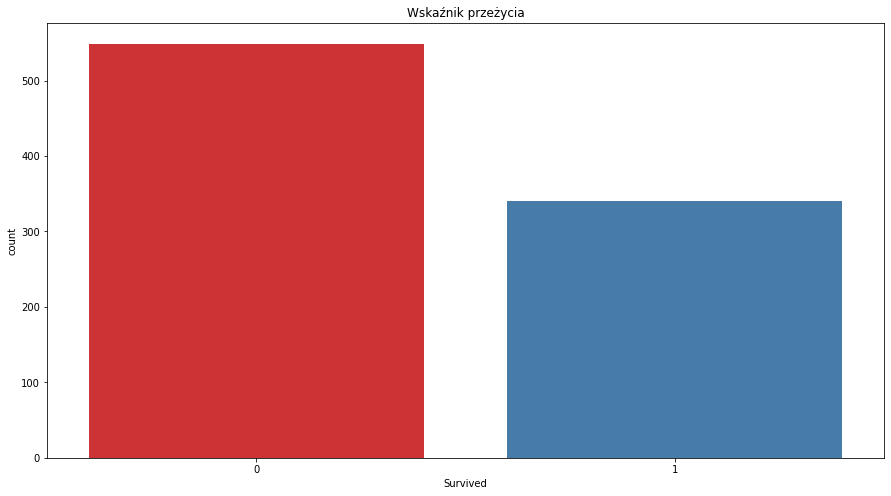

In [11]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Survived', data = dataset, palette='Set1')
plt.title('Wskaźnik przeżycia')
plt.show()

Na osi X znajduje się zmienna **Survived**, która informuje czy pasażer przeżył katastrofę czy też nie (0 jeśli nie przeżył, 1 jeśli przeżył). Na osi Y jest przybliżona liczba pasażerów. Z wykresu można odczytać, że większość pasażerów niestety nie przeżyła katastrofy. Istnieją również ludzie, którym udało się uniknąć śmierci. W kolejnych etapach analizy sprawdzę czynniki, które mogły mieć wpływ na taki rozkład.

### Wiek

Biorąc pod uwagę dane statystyczne wiek osoby, która przeżyła wypadek ma duże znaczenie. Osoby młode, ze względu na naturalne warunki i silny organizm częściej przeżywają zdarzenia losowe. Często również, podobnie jak kobiety, są ratowani w pierwszej kolejności. Dlatego wiek może mieć również być czynnikiem wpływającym na wskaźnik przeżycia. Poniżej zostały przedstawione dwa histogramy: pierwszy pokazuje wiek ludzi, którzy przeżyli, drugi przedstawia wiek ludzi, których nie udało się uratować.

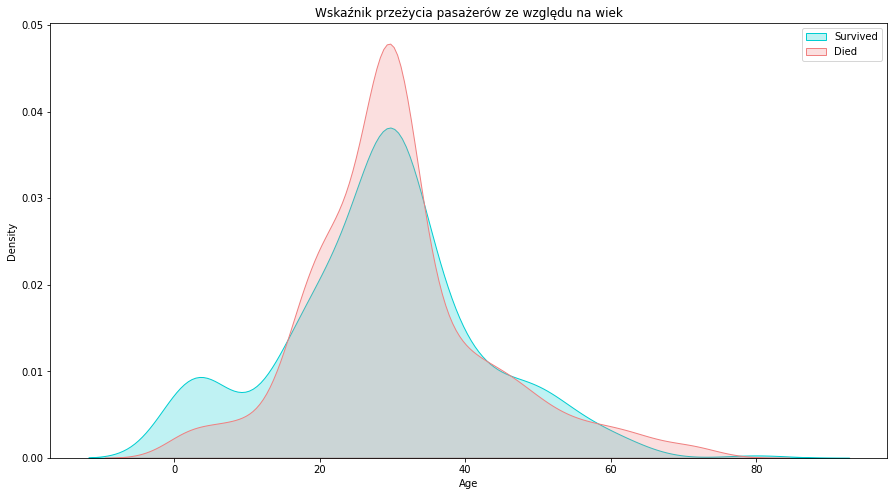

In [12]:
plt.figure(figsize=(15, 8))
sns.kdeplot(dataset["Age"][dataset.Survived == 1], color = "darkturquoise",
           shade=True)
sns.kdeplot(dataset["Age"][dataset.Survived == 0], color = "lightcoral",
           shade=True)
plt.legend(['Survived', 'Died'])
plt.title("Wskaźnik przeżycia pasażerów ze względu na wiek")
plt.show()


Na podstawie powyższego wykresu wynika, że współczynnik przeżycia jest wysoki wśród pasażerów do 10 roku życia. Wynika to prawdopodobnie z tego, że w pierwszej kolejności są oni ratowai. Widać również, że zginęła duża liczba osób w wieku od 20 do 40 lat. Osoby te, oprócz ratowania samych siebie musiały również pomóc innym.

### Klasa, którą podróżował pasażer

Drugim czynnikiem, który może mieć wpływ na to czy pasażer przeżył czy nie jest klasa, którą podróżował

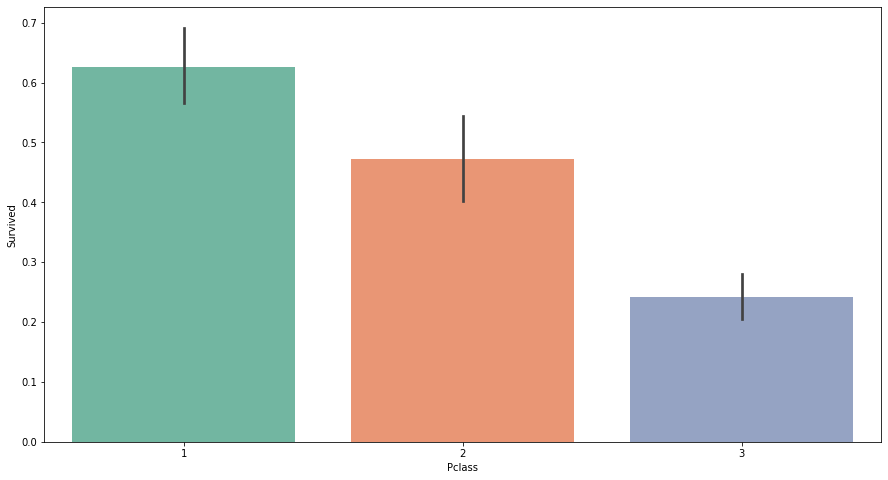

In [13]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Pclass', y='Survived', data=dataset, palette='Set2')
plt.show()


Na osi X nałożono klasę biletu przyjmującą wartość od 1 do 3 gdzie:

* 1 - klasa najwyższa,
* 2 - klasa średnia,
* 3 - klasa najniższa.

Można zauważyć, że liczba osób, która zginęła, posiadała bilet klasy 3. Klasa pierwsza natomiast miała najmniejszą liczbę zgonów. Wniosek jaki się nasuwa jest taki, że klasa biletu zakupionego przez pasażera miała znaczenie w szansach przeżycia.

### Płeć

Biorąc pod uwagę dane statystyczne innych zdarzeń najczęstszymi sprawcami wypadków są mężczyźni niż kobiety. Przekłada się to również na wskaźniki ofiar w wypadkach - kobiety częściej przeżywają wypadki np. drogowe. W związku z tym w raporcie został wykorzystany ten czynnik. Jego wykres został przedstawiony poniżej

<Figure size 1080x576 with 0 Axes>

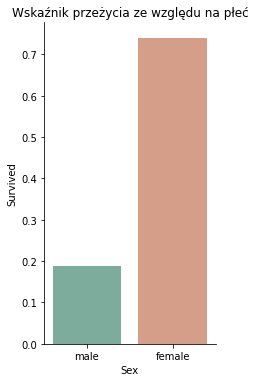

In [14]:
plt.figure(figsize=(15, 8))
sns.catplot(x = "Sex", y="Survived", data=dataset,
                  saturation=.5, kind="bar", ci=None, aspect=.6, palette="Set2")
plt.title("Wskaźnik przeżycia ze względu na płeć")
plt.show()

Na osi X znajduje się płeć. Kolorem zielonym oznaczono mężczyzn natomiast różowym kobiety. 

Od razu widać, że ilość kobiet, które przeżyły znacznie przewyższa ilość mężczyzn. Wniosek jaki się nasuwa jest taki, że w pierwszej kolejności, podczas wypadków i katastrof, ratowane są kobiety. Można uznać, że był to jeden z czynników, które miały wpływ na to czy danej osobie udało się przeżyć.

## Podsumowanie

Po zapoznaniu się ze zbiorem danych oraz przygotowaniu go do analizy można wyciągnąć wniosek, że czynniki, które zostały przedstawione przez autora (płeć, wiek oraz klasa biletu) miały wpływ na to czy pasażer przeżył katastrofę bądź nie. Wynikiem tej analizy są następujące:

* Najwięcej pasażerów, którzy przeżyli katastrofę były kobiety oraz dzieci,
* Największa śmiertelność była wśród mężczyzn oraz u osób w wieku 20-40 lat,
* Klasa biletu pasażera miała znaczenie podczas ucieczki z tonącego statku - najmniejsza śmiertelność wśród osób posiadających bilet klasy 1, odwrotnie proporcjonalna dla osób posiadających bilet klasy 3.